In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier  # XGBoost
from lightgbm import LGBMClassifier  # lightGBM
from sklearn.metrics import roc_curve 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [5]:

# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import auc
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import recall_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 

In [6]:
df = pd.read_csv('creditcard.csv')

## Exploratory Data Analysis and Data Preprocessing

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#  Data has no null value
df.isnull().sum()   

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# check data distributions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


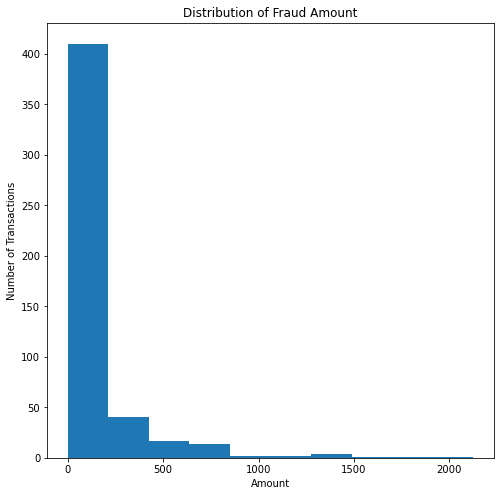

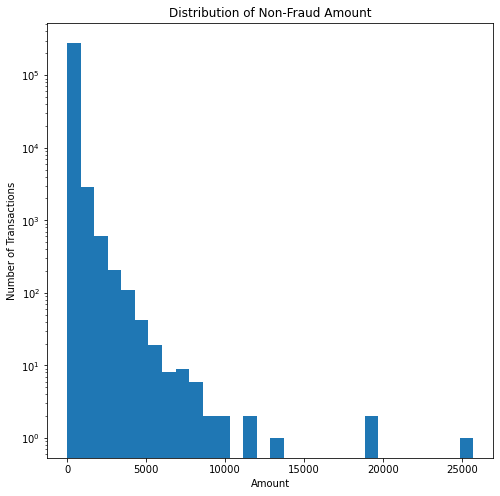

In [10]:
# change 'time' from seconds to hours of the day during period of two days
df['Hour'] =df["Time"].apply(lambda x : divmod(x, 3600)[0]) 

# relationship between Fraud and Amount
plt.figure(figsize=(8,8))
plt.hist(df["Amount"][df["Class"]== 1])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title("Distribution of Fraud Amount")
plt.show()

plt.figure(figsize=(8,8))
plt.hist(df["Amount"][df["Class"]== 0], bins = 30)
plt.yscale('log')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title("Distribution of Non-Fraud Amount")
plt.show()

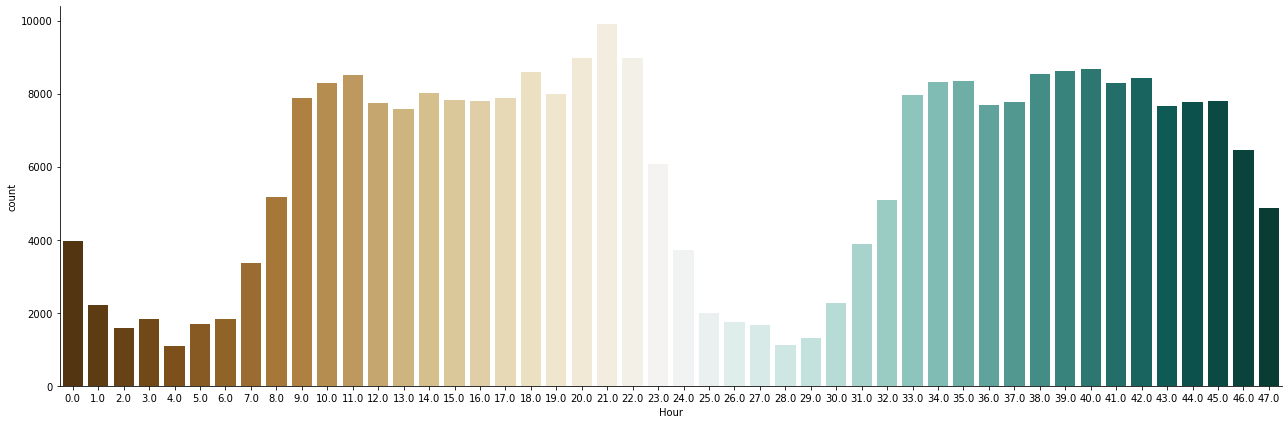

In [11]:
# Credit card was most likely to be used during 9am to 10pm.
sns.factorplot(x="Hour", data=df, kind="count",  palette="BrBG", size=6, aspect=3)

Text(0.5, 1.0, 'Distribution of Fraud and Non-Fraud')

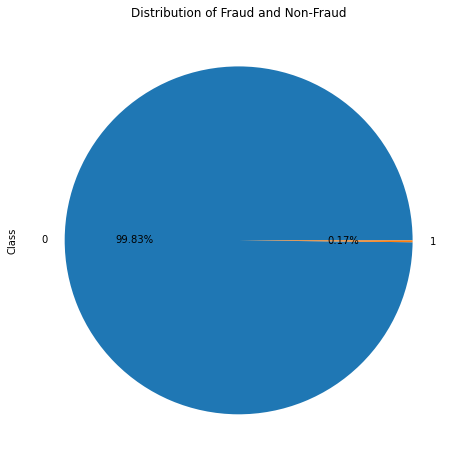

In [12]:
# Data is highly unbalanced, there is only a little sample of Not-Fraud
plt.figure(figsize=(8,8))
df['Class'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')
plt.title("Distribution of Fraud and Non-Fraud")

## Model Training

In [7]:
X_original = df.drop(columns='Class')
y_original = df['Class']

Before balancing the normal and abnormal class, I want to split dataset into train dataset and test dataset, and also classifiers are tested on the original dataset, hence we do not want to test the classifier on our own test set with a training set of our own constructed data. Also, to make the trainning set and test set to have the same distribution of fraudulent and genuine transactions, I used StatifiedKFold to divide dataset.

In [8]:
from sklearn.model_selection import StratifiedKFold
X_original = df.drop(columns='Class')
y_original = df['Class']
sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
for train_index,test_index in sss.split(X_original,y_original):
    X_train,X_test = X_original.iloc[train_index],X_original.iloc[test_index]
    y_train,y_test = y_original.iloc[train_index],y_original.iloc[test_index]


print('Train：',[y_train.value_counts()/y_train.value_counts().sum()])
print('Test:',[y_test.value_counts()/y_test.value_counts().sum()])

Train： [0    0.998271
1    0.001729
Name: Class, dtype: float64]
Test: [0    0.99828
1    0.00172
Name: Class, dtype: float64]


In [9]:
from collections import Counter

X = X_train.copy()
y = y_train.copy()
print('Original Imblanced samples: ', Counter(y))
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X, y)
print('Random under sample: ', Counter(y_rus))


smote = SMOTE(random_state=1,sampling_strategy=0.5)
X_smote, y_smote = smote.fit_resample(X, y)
print('SMOTE: ', Counter(y_smote))


under = RandomUnderSampler(sampling_strategy=1)
X_smote, y_smote = under.fit_resample(X_smote,y_smote)
print('SMOTE: ', Counter(y_smote))


Original Imblanced samples:  Counter({0: 227452, 1: 394})
Random under sample:  Counter({0: 394, 1: 394})
SMOTE:  Counter({0: 227452, 1: 113726})
SMOTE:  Counter({0: 113726, 1: 113726})


In [10]:
Classifiers = {
    'LogisticRegression': LogisticRegression(random_state=1),
                   'KNN': KNeighborsClassifier(),
                   'SVM': SVC(random_state=1,probability=True),
                   'DecisionTree': DecisionTreeClassifier(random_state=1),
                   'RandomForest': RandomForestClassifier(random_state=1),
                   'XGboost': XGBClassifier(random_state=1),
                   'LightGBM': LGBMClassifier(random_state=1)}

def train_test(Classifiers, X_train, y_train, X_test, y_test):
    y_pred = pd.DataFrame()
    Accuracy_Score = pd.DataFrame()
    for model_name, model in Classifiers.items():
        model.fit(X_train, y_train)
        y_pred[model_name] = model.predict(X_test)
        y_pred_pra = model.predict_proba(X_test)
        Accuracy_Score[model_name] = pd.Series(model.score(X_test, y_test))
        # calculate recall 
        print(model_name, '\n', classification_report(
            y_test, y_pred[model_name]))
        fig, ax = plt.subplots(1, 1)
        plot_confusion_matrix(model, X_test, y_test, labels=[
                              0, 1], cmap='Blues', ax=ax)
        ax.set_title(model_name)
        # roc
        plt.figure()
        fig,(ax1) = plt.subplots(1,1,figsize=(10,4))
        fpr, tpr, thres = roc_curve(y_test, y_pred_pra[:, -1])
        ax1.plot(fpr, tpr)
        ax1.set_title(model_name +' ROC')
        ax1.set_xlabel('False positive rate')
        ax1.set_ylabel('True positive rate')

    return y_pred,Accuracy_Score


In [17]:
Counter(y_test)

Counter({1: 98, 0: 56863})

LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.12      0.87      0.22        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.

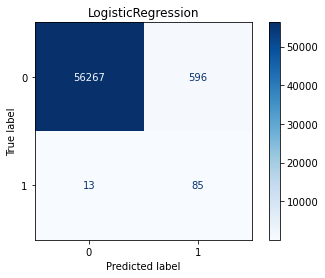

<Figure size 432x288 with 0 Axes>

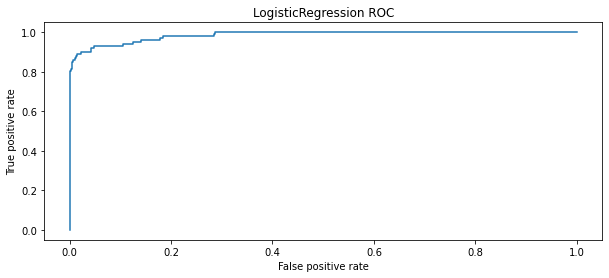

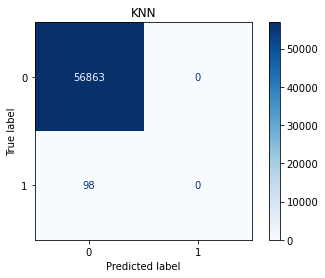

<Figure size 432x288 with 0 Axes>

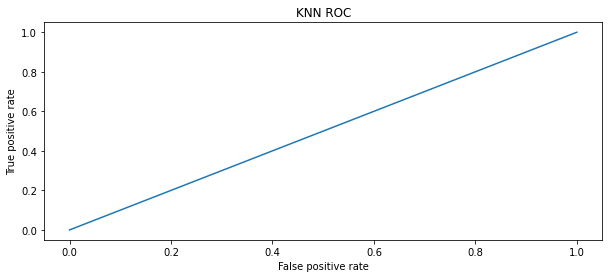

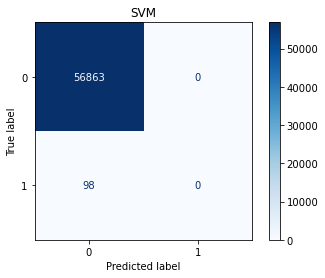

<Figure size 432x288 with 0 Axes>

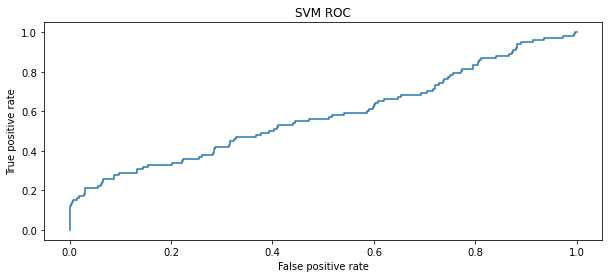

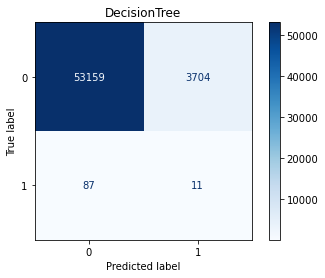

<Figure size 432x288 with 0 Axes>

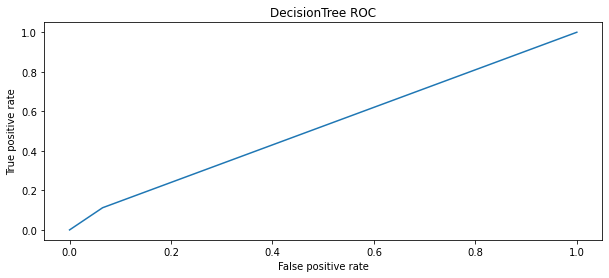

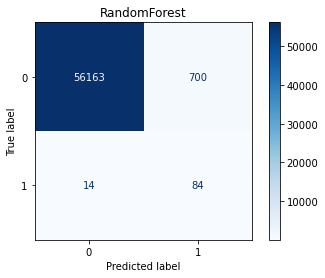

<Figure size 432x288 with 0 Axes>

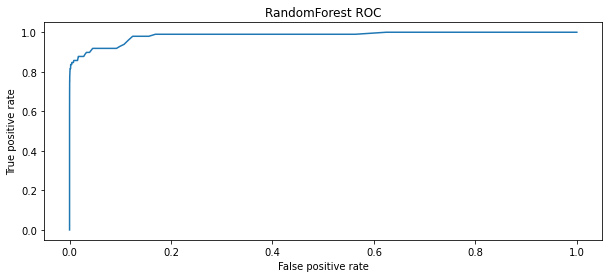

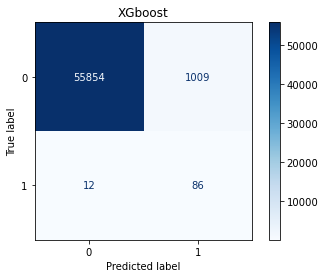

<Figure size 432x288 with 0 Axes>

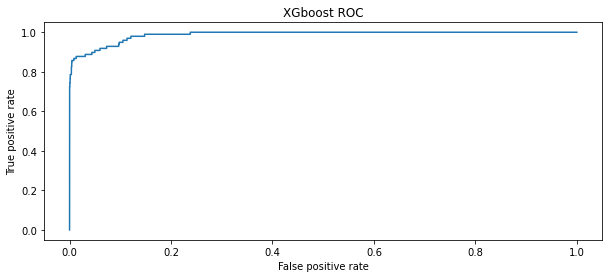

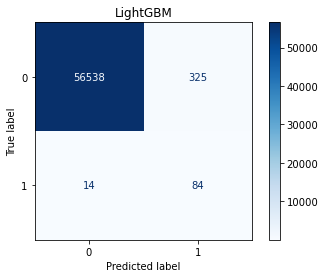

<Figure size 432x288 with 0 Axes>

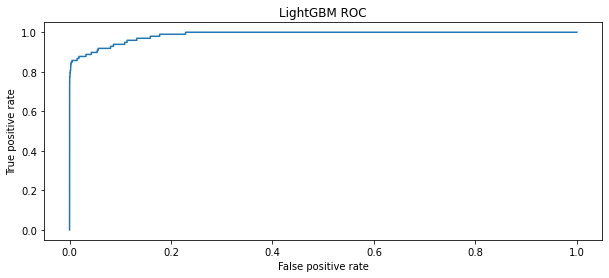

In [18]:
Y_pred,Accuracy_score = train_test(Classifiers, X_rus, y_rus, X_test, y_test)

In [19]:
Accuracy_score

,LogisticRegression,KNN,SVM,DecisionTree,RandomForest,XGboost,LightGBM
0,0.989308,0.99828,0.99828,0.933446,0.987465,0.982075,0.994049


From the untuned classification models above, the accuracy of the classifiers are high, however in this imbalanced-sample fraud detection problem, the recall score is more important, hence the mission is more related to detect the fradulent transactions. For instance, the untuned SVM classifier has a accuracy of 99.8%, however it has a recall score of 0 and the confusion matrix tells us that it has labeled all 98 fraud transaction as non-fraud. Therefore, we do not want to use the untuned SVM classifier despite that it has a high accuracy.

Hyperparameters for a classifier can be selected using several techniques such as Random Search, Grid Search, Manual Search, Bayesian Optimizations. The grid search method will be used here to find the optimal hyperparameters.

In [11]:
# gridsearch
from sklearn.model_selection import GridSearchCV
def reg_best(X_train, y_train):
    log_reg_parames = {'penalty': ['l1', 'l2'],
                       'C': [0.001, 0.01, 0.05, 0.1, 1, 10]}
    grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_parames)
    grid_log_reg.fit(X_train, y_train)
    log_reg_best = grid_log_reg.best_estimator_
    return log_reg_best


def KNN_best(X_train, y_train):
    KNN_parames = {'n_neighbors': [3, 5, 7, 9, 11, 15], 'algorithm': [
        'auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_KNN = GridSearchCV(KNeighborsClassifier(), KNN_parames)
    grid_KNN.fit(X_train, y_train)
    KNN_best_ = grid_KNN.best_estimator_
    return KNN_best_


def DecisionTree_best(X_train, y_train):
    DT_parames = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)),
                  "min_samples_leaf": list(range(5, 7, 1))}
    grid_DT = GridSearchCV(DecisionTreeClassifier(), DT_parames)
    grid_DT.fit(X_train, y_train)
    DT_best = grid_DT.best_estimator_
    return DT_best


def RandomForest_best(X_train, y_train):
    RF_params = {'n_estimators': [10, 50, 100, 150, 200], 'criterion': [
        'gini', 'entropy'], "min_samples_leaf": list(range(5, 7, 1))}
    grid_RF = GridSearchCV(RandomForestClassifier(), RF_params)
    grid_RF.fit(X_train, y_train)
    RT_best = grid_RF.best_estimator_
    return RT_best

def XGboost_best(X_train, y_train):
    XGB_params = {'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [5, 10, 15, 20], 'learning_rate': [
        0.01, 0.05, 0.1, 0.5, 1]}
    grid_XGB = GridSearchCV(XGBClassifier(), XGB_params)
    grid_XGB.fit(X_train, y_train)
    XGB_best_ = grid_XGB.best_estimator_
    return XGB_best_


def LGBM_best(X_train, y_train):
    LGBM_params = {'boosting_type': ['gbdt', 'dart', 'goss', 'rf'], 'num_leaves': [21, 31, 51], 'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [5, 10, 15, 20], 'learning_rate': [
        0.01, 0.05, 0.1, 0.5, 1]}
    grid_LGBM = GridSearchCV(LGBMClassifier(), LGBM_params)
    grid_LGBM.fit(X_train, y_train)
    LGBM_best_ = grid_LGBM.best_estimator_
    return LGBM_best_

def SVC_best(X_train, y_train):
    SVC_parames = {'C': [0.5, 0.7, 0.9, 1], 'kernel': [
        'rbf', 'poly', 'sigmoid', 'linear'], 'probability': [True]}
    grid_SVC = GridSearchCV(SVC(), SVC_parames)
    grid_SVC.fit(X_train, y_train)
    SVC_best = grid_SVC.best_estimator_
    return SVC_best




In [ ]:
Classifiers = {'LogisticRegression': reg_best(X_rus, y_rus),
              'KNN': KNN_best(X_rus, y_rus),
                   'DecisionTree': DecisionTree_best(X_rus, y_rus),
                   'RandomForest': RandomForest_best(X_rus, y_rus),
                   'XGboost': XGboost_best(X_rus, y_rus),
                   'LightGBM': LGBM_best(X_rus, y_rus)}

In [18]:
Classifiers['SVC'] = SVC(C=0.7, probability=True)
Classifiers

{'LogisticRegression': LogisticRegression(C=1),
 'KNN': KNeighborsClassifier(n_neighbors=7),
 'DecisionTree': DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5),
 'RandomForest': RandomForestClassifier(min_samples_leaf=5, n_estimators=150),
 'XGboost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=10, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=150, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 'LightGBM': LGBMClassifier(boosting_type='dart', learning_rate=1, max_depth=20,


LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.26      0.83      0.40        98

    accuracy                           1.00     56961
   macro avg       0.63      0.91      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

DecisionTree 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.83      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.90      0.54     56961
weighted avg       1.00      0.9

,LogisticRegression,KNN,DecisionTree,RandomForest,XGboost,LightGBM,SVC
0,0.995716,0.99828,0.972806,0.980759,0.981075,0.984252,0.99828


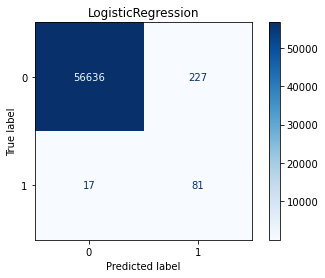

<Figure size 432x288 with 0 Axes>

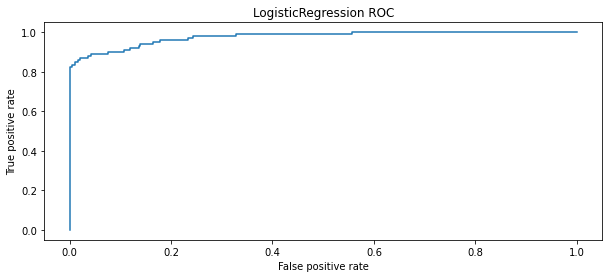

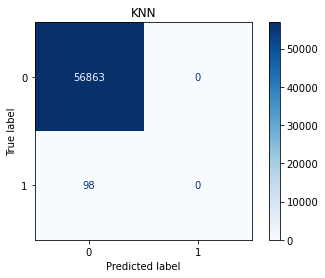

<Figure size 432x288 with 0 Axes>

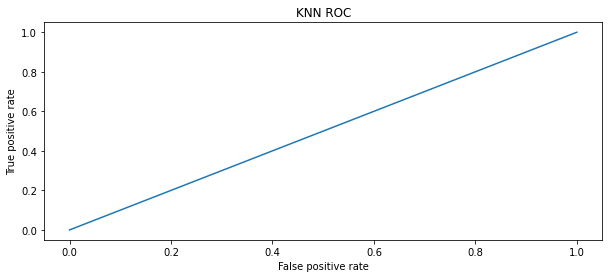

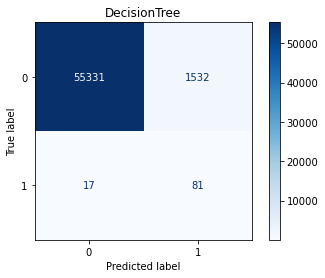

<Figure size 432x288 with 0 Axes>

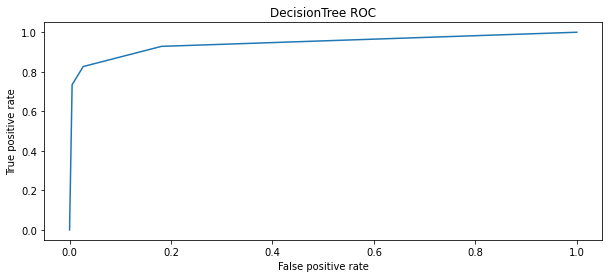

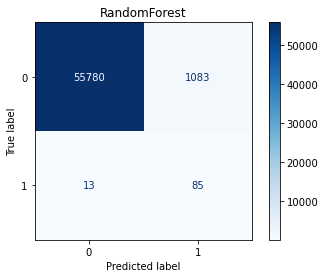

<Figure size 432x288 with 0 Axes>

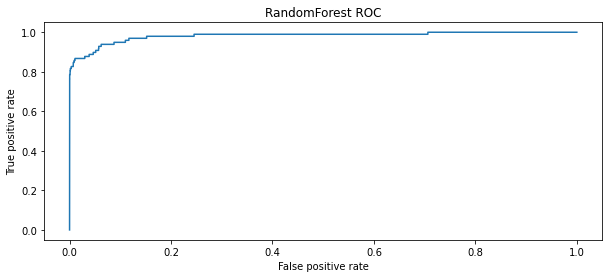

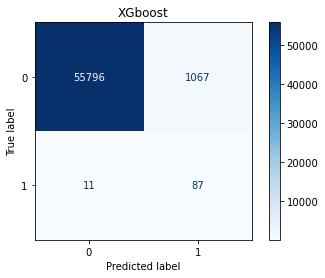

<Figure size 432x288 with 0 Axes>

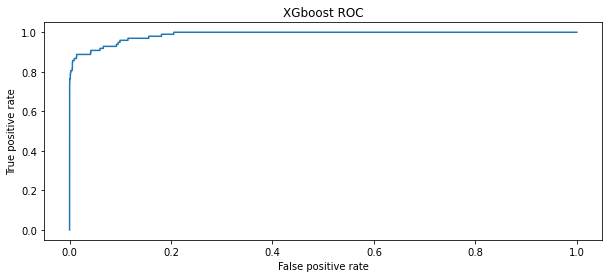

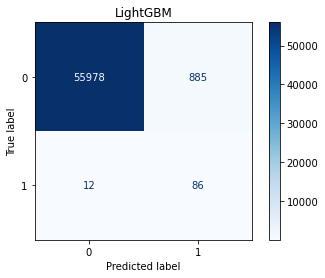

<Figure size 432x288 with 0 Axes>

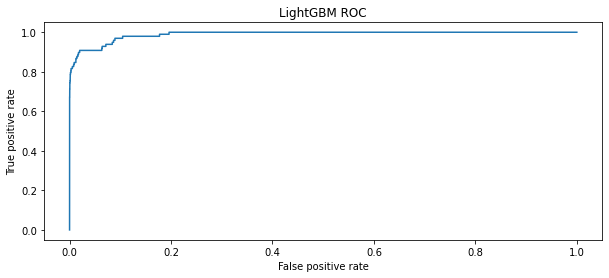

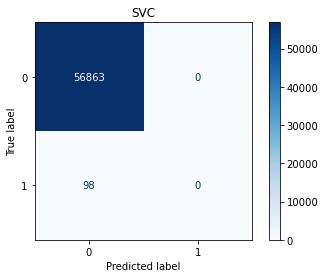

<Figure size 432x288 with 0 Axes>

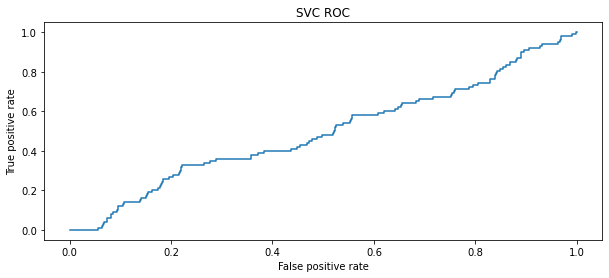

In [20]:
# trainning with tuned classifiers
Y_pred,Accuracy_score = train_test(
    Classifiers, X_rus, y_rus, X_test, y_test)
Accuracy_score


After tunning the hyperparameters, most classifiers increased accuracy, and a few have decreased accuracy. Most importantly, the recall score has not increased significantly, and even some classifiers have decreased recall score.  So it appears that we still do not have a good classifier for fraud detection. Additionally, a subpar test result is obtained since there were far less training samples utilised than test samples.

LogisticRegression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.79      0.78        98

    accuracy                           1.00     56961
   macro avg       0.89      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.0

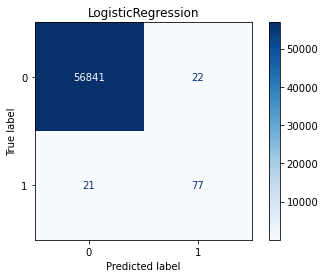

<Figure size 432x288 with 0 Axes>

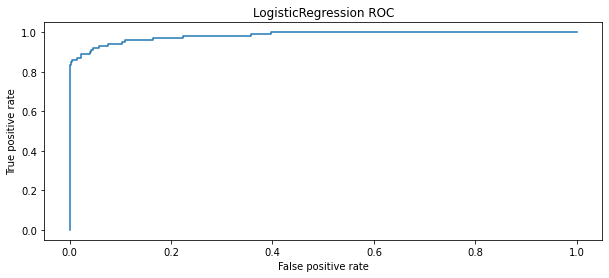

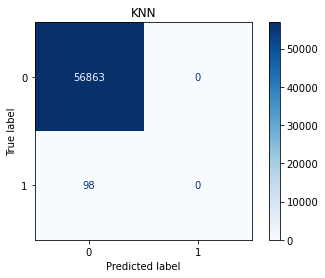

<Figure size 432x288 with 0 Axes>

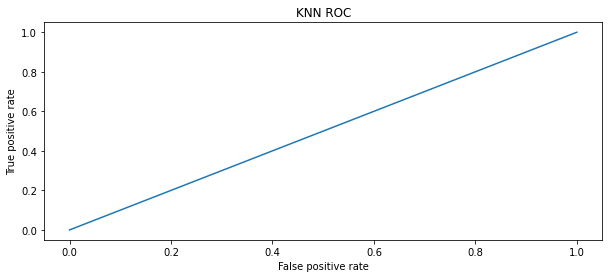

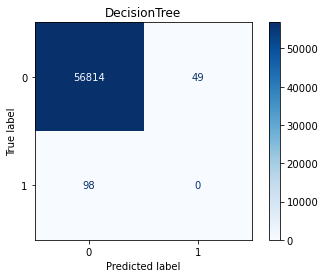

<Figure size 432x288 with 0 Axes>

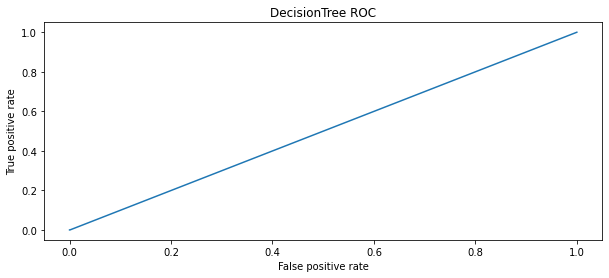

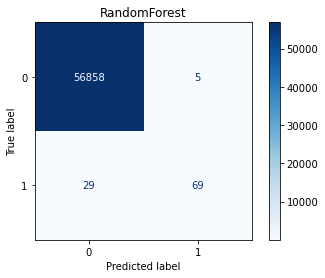

<Figure size 432x288 with 0 Axes>

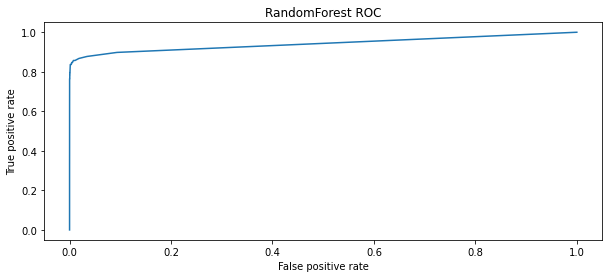

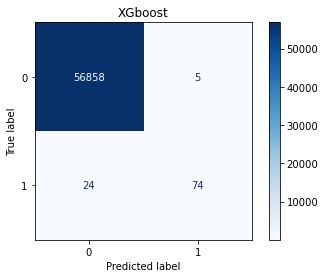

<Figure size 432x288 with 0 Axes>

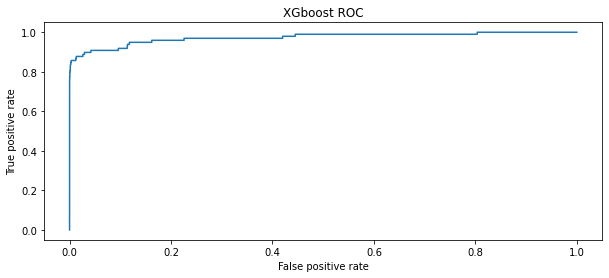

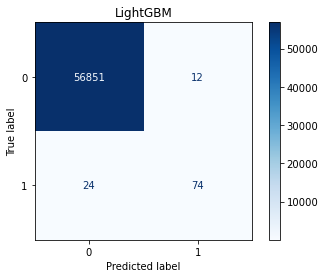

<Figure size 432x288 with 0 Axes>

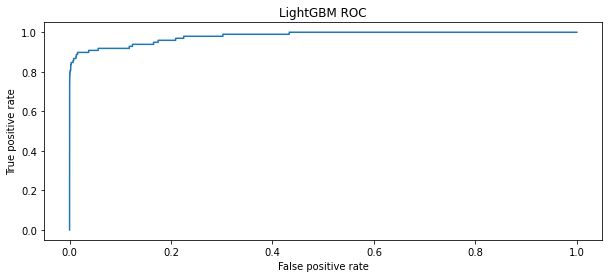

In [13]:
# SMOTE
Classifiers = {
    'LogisticRegression': LogisticRegression(random_state=1),
    'KNN': KNeighborsClassifier(),
#     'SVM': SVC(kernel = 'linear',probability = True),
    'DecisionTree': DecisionTreeClassifier(random_state=1),
    'RandomForest': RandomForestClassifier(random_state=1),
    'XGboost': XGBClassifier(random_state=1),
    'LightGBM': LGBMClassifier(random_state=1)
}
Y_pred, Accuracy_score = train_test(
    Classifiers, X_smote, y_smote, X_test, y_test)
print(Accuracy_score)

